<a href="https://colab.research.google.com/github/Vicky-0222/ML/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Для практики №2 взяла датасет "blood" из kaggle.**

# 1. Анализ целевой переменной Y с точки зрения статистики

**1. Импорт необходимых библиотек**

In [134]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**2. Загружаем набор данных**

In [135]:
df =  pd.read_csv('/content/blood.csv')

In [136]:
df

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [137]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: Recency
колонка: Frequency
колонка: Monetary
колонка: Time
колонка: Class


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


**3. Проверяем наличие пропущенных значений и работа с пропусками для числовых**

In [139]:
# проверка на пропущенные значения
print(df.isnull().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [140]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size = 5, replace = True)]

,Recency,Frequency,Monetary,Time,Class
102,4,9,2250,40,0
435,16,7,1750,93,0
270,16,11,2750,40,0
106,0,8,2000,59,0
71,2,4,1000,16,0


In [141]:
# проверка на пропущенные значения
print(df_test_nan.isnull().sum())

Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [142]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [144]:
df_median = df_test_nan.copy()
df_median.Class = df_median.Class.fillna(df_median.Class.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [145]:
df_mean = df_test_nan.copy()
df_mean.Class = df_mean.Class.fillna(df_median.Class.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum())


# Заполнение пропусков средним
Recency      0
Frequency    0
Monetary     0
Time         0
Class        0
dtype: int64


In [82]:
# Заполнение категориальных признаков происходит с помощью df.category_variable.mode()

**4. Выбираем целевую переменную**

In [146]:
df['frequency_of_blood'] = np.where(df['Frequency'] >= 5, 1, 0).astype(int)

In [147]:
df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Time', 'Class',
       'frequency_of_blood'],
      dtype='object')

In [148]:
Y = df['frequency_of_blood']
X = df.drop('frequency_of_blood', axis=1)

X = X.drop('Frequency', axis=1)

**5. Графический анализ**

In [149]:
numeric_cols = X.select_dtypes(include=['int64'])
numeric_cols

,Recency,Monetary,Time,Class
0,2,12500,98,1
1,0,3250,28,1
2,1,4000,35,1
3,2,5000,45,1
4,1,6000,77,0
...,...,...,...,...
743,23,500,38,0
744,21,500,52,0
745,23,750,62,0
746,39,250,39,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


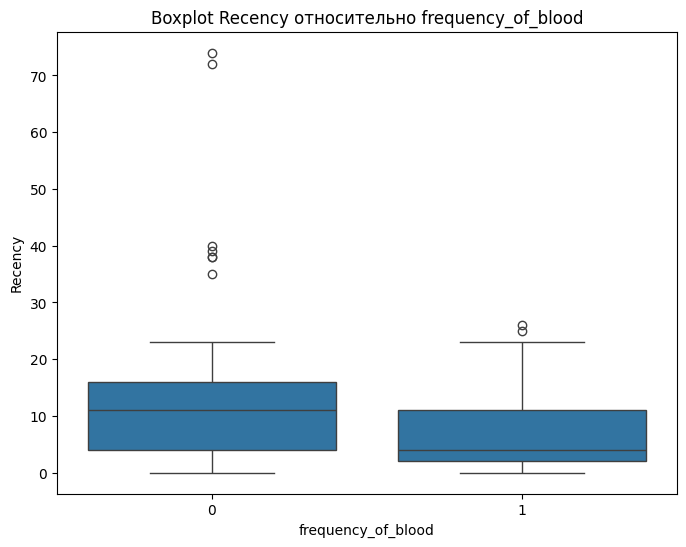

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


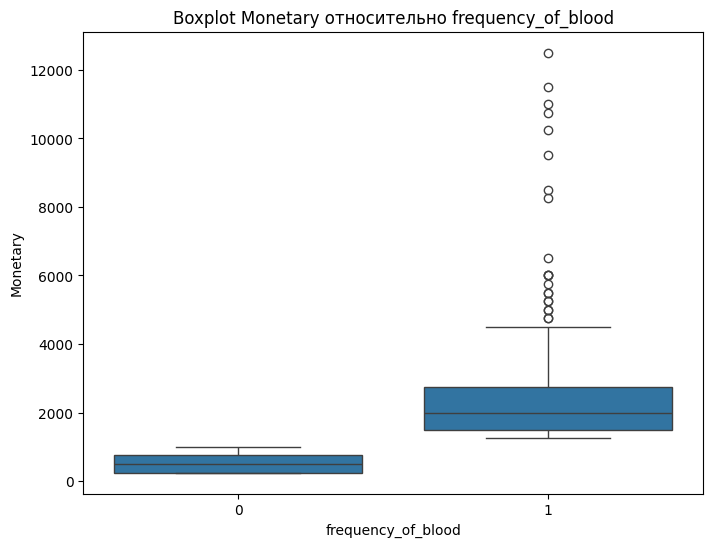

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


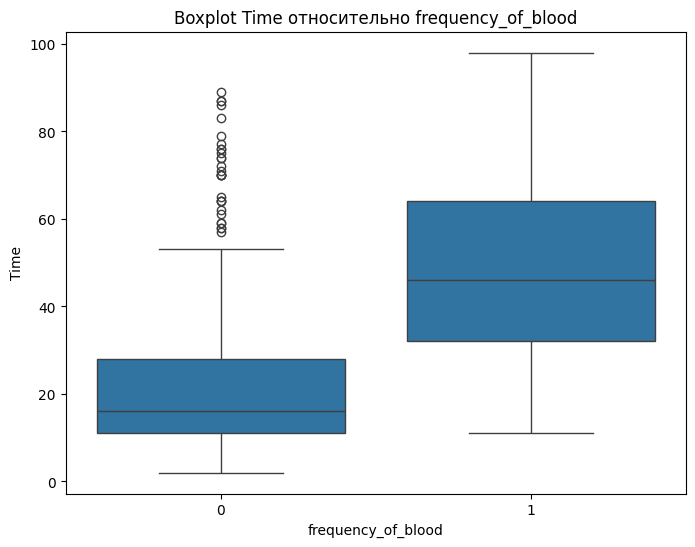

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


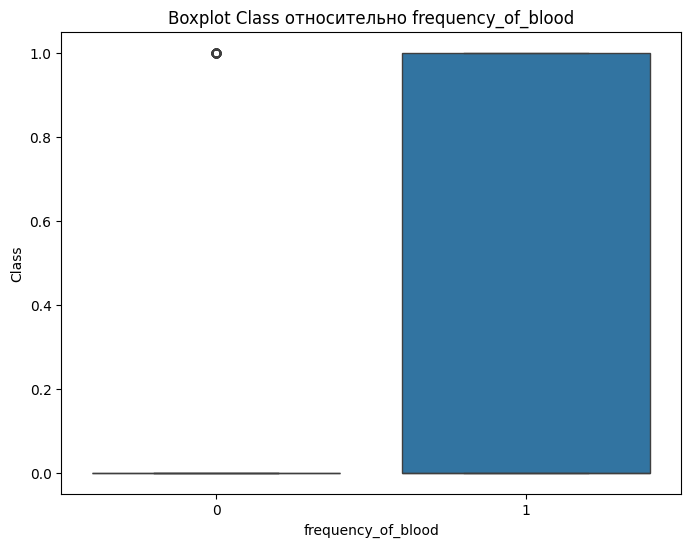

In [150]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='frequency_of_blood', y=col, data=df)
    plt.title(f'Boxplot {col} относительно frequency_of_blood')
    plt.show()


**Описание полученных результатов**